In [1]:
import numpy as np
import random
import pandas as pd
import matplotlib.pyplot as plt
import os

import sys 
sys.path.append("..") 
import add_mypathlevy

In [2]:
def load_results(dx, dt, N, u_supp, t_range, kernel_type, initial_type, bandwidth, scale_value, method_our):
    datafolder = os.path.join(add_mypathlevy.kdedata_folder, f"KDEpure{method_our}_dx{np.around(dx, decimals=2)}_dt{dt}_N{N}_supp_u{u_supp[-1]}_t_range{t_range[-1]}_kernel_type{kernel_type}_initial_type{initial_type}_bandwidth{bandwidth}")
    Data_set = np.load(os.path.join(datafolder, f"bikernel_data_scale{scale_value}.npz"),allow_pickle=True)
    Loss_set = np.load(os.path.join(datafolder, f"bikernel_loss_scale{scale_value}.npz"),allow_pickle=True)
    G_set = np.load(os.path.join(datafolder, f"bikernel_Gbar_scale{scale_value}.npz"),allow_pickle=True)
    Lnorm_set = np.load(os.path.join(datafolder, f"bikernel_L2l2{scale_value}.npz"),allow_pickle=True)
    return Data_set, Loss_set, G_set,Lnorm_set

In [3]:
dx = 0.01# space mesh size for generating data
N = 30 # number of data pairs (u_i, f_i);
u_Type = 'Compoundpdf'  # types: 'Compoundpdf';'Laplacepdf'
x_range = [-5, 5] # space range
dt = 0.05 # time mesh size  
t_range = [0, 5]  # time range
example_type = 'nonlocal'   
kernel_type = 'Compoundlevy' # 'Compoundlevy' Laplacejump
scale_value = 1
method_our = 'BiSNGD'
u_supp = [0,2]
initial_type = "zero"
bandwidth = 0.105#21

In [4]:
dataset, lossset, Gset, Lnorm_set = load_results(dx, dt, N, u_supp, t_range, kernel_type, initial_type, bandwidth, scale_value, method_our)
r_seq = dataset["r_seq"]
x_reg6 = dataset["x_reg6"]
x_reg4 = dataset["x_reg4"]
x_reg7 = dataset["x_reg7"]
x_reg8 = dataset["x_reg8"]
x_reg9 = dataset["x_reg9"]
K_true_val = dataset["K_true_val"]

iteration_history  = lossset["iteration_history"]
loss_history  = lossset["loss_history"]
error_history  = lossset["error_history"]
relative_err = lossset["relative_err"]
relative_errL = lossset["relative_errL"]
gamma_history = lossset["gamma_history"]

G_bar = Gset["G_D1"]
xreg7_history = Gset["xreg7_history"]
rho_val = Gset["rho_val"]

x_reg7L = Lnorm_set['x_reg7L']
x_reg7l = Lnorm_set['x_reg7l']

In [5]:
print("relative_err",relative_err)

relative_err [['auto-RKHS-iDarr' 0.036482207533612664]
 ['Gbar-Tikh' 0.04209122157092672]
 ['Gaussian-iDarr' 0.03454280601602407]
 ['auto-RKHS-LC' 0.044405993904565545]
 ['Gaussian-RKHS-LC' 0.06245550380662024]
 ['Gbar-LC' 0.04209122157092672]
 ['Gbar-GCV' 0.06866461131081457]
 ['auto-RKHS-GCV' 0.04440611747328745]
 ['Gbar-Bilevel' 0.039390301389309844]]


In [6]:
print("relative_errL",relative_errL)

relative_errL [['Gbar-LC-RKHS' 0.04209122157092672]
 ['Gbar-GCV-RKHS' 0.06866461131081457]
 ['Gbar-Bilevel-RKHS' 0.039363815375447274]
 ['Gbar-LC-L2' 6.1286822404844665]
 ['Gbar-LC-l2' 0.04424448033206464]
 ['Gbar-GCV-L2' 5.26704078743826]
 ['Gbar-GCV-l2' 0.0707626152017277]
 ['Gbar-Bilevel-L2' 5.34338898275979]
 ['Gbar-Bilevel-l2' 0.045997796961095516]]


In [7]:
log10_loss = [np.log10(loss) for loss in loss_history]
log10_error = [np.log10(error) for error in error_history]

In [8]:
gamma6   = np.log10(dataset['reg6_corner'].item()).round(2)
gamma8   = np.log10(dataset['reg8_corner'].item()).round(2)
gamma4   = np.log10(dataset['reg4_corner'].item()).round(2)
gamma9   = np.log10(dataset['reg9_corner'].item()).round(2)
gamma7   = np.log10(dataset['reg7_corner'].item()).round(2)

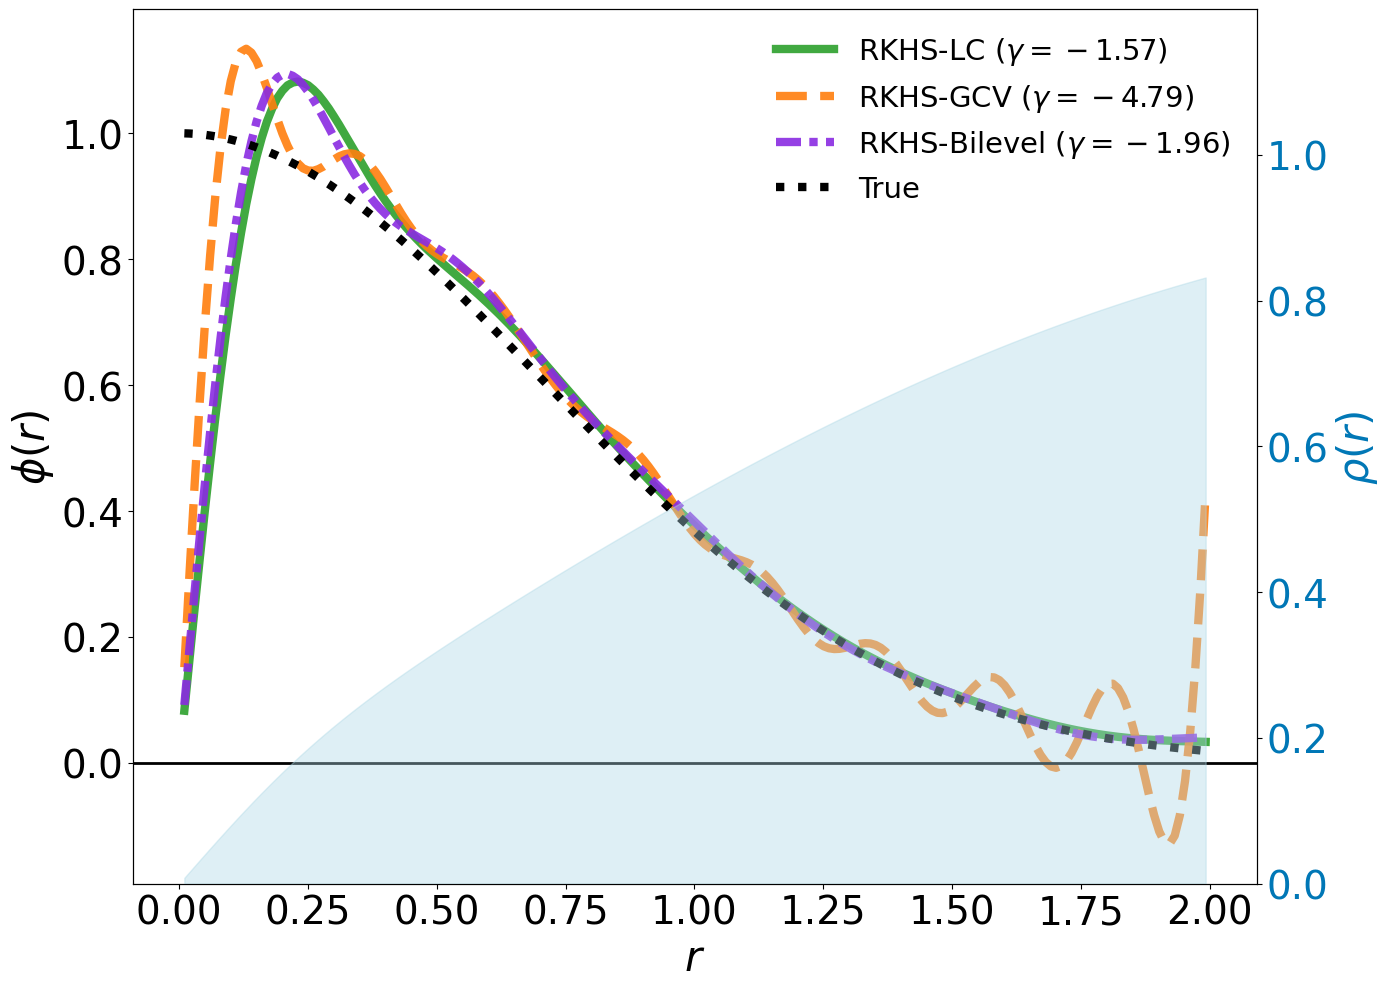

In [12]:
# Increase figure size for better spacing
fig, ax1 = plt.subplots(figsize=(14, 10))

# Define colors and styles for all six estimator curves
colors = plt.get_cmap('tab10').colors
estimator_colors = list(colors[:5]) + ['#000000']

linestyles = ['-', '--', '-.', ':', (0, (3, 1, 1, 1)), ':']  # Various dash styles

# Increase linewidth for better visibility
linewidth_value = 6  # Increased linewidth for clear visualization

# Plot all six estimator curves
ax1.plot(r_seq, x_reg6, color=estimator_colors[2], linestyle=linestyles[0],
         linewidth=linewidth_value, alpha=0.9,
         label=f"RKHS-LC ($\\gamma={gamma6}$)")
ax1.plot(r_seq, x_reg8, color=estimator_colors[1], linestyle=linestyles[1],
         linewidth=linewidth_value, alpha=0.9,
         label=f"RKHS-GCV ($\\gamma={gamma8}$)")
# ax1.plot(r_seq, x_reg4, color=estimator_colors[2], linestyle=linestyles[2],
#          linewidth=linewidth_value, alpha=0.9,
#          label=f"auto-RKHS-LC ($\\gamma={gamma4}$)")
# ax1.plot(r_seq, x_reg9, color=estimator_colors[3], linestyle=linestyles[3],
#          linewidth=linewidth_value, alpha=0.9,
#          label=f"auto-RKHS-GCV ($\\gamma={gamma9}$)")
ax1.plot(r_seq, x_reg7, color="#8A2BE2", linestyle=linestyles[4],
         linewidth=linewidth_value, alpha=0.9,
         label=f"RKHS-Bilevel ($\\gamma={gamma7}$)")
ax1.plot(r_seq, K_true_val, color=estimator_colors[5], linestyle=linestyles[5],
         linewidth=linewidth_value, alpha=1.0, label="True")

ax1.axhline(y=0, color='black', linewidth=2)
#ax1.set_ylim(0, 1.1)

# Secondary y-axis for rho(r)
ax2 = ax1.twinx()
ax2.fill_between(r_seq, 0, rho_val, color='#add8e6', alpha=0.4)  # Light blue shaded region for rho(r)

# Formatting for axes
ax1.set_xlabel(r'$r$', fontsize=30, fontweight='bold')
ax1.set_ylabel(r'$\phi(r)$', fontsize=30, fontweight='bold')
ax2.set_ylabel(r'$\rho(r)$', fontsize=30, fontweight='bold', color='#0077b6')

# **Set secondary y-axis range to [0,1.2] but show ticks only from [0,1]**
ax2.set_ylim(0, 1.2)
ax2.set_yticks([0, 0.2, 0.4, 0.6, 0.8, 1.0])  # Show ticks only up to 1

# Increase tick size to match the larger figure
ax1.tick_params(axis='x', labelsize=28)
ax1.tick_params(axis='y', labelsize=28)
ax2.tick_params(axis='y', labelsize=28, labelcolor='#0077b6')

# Improve grid visibility
#ax1.grid(True, linestyle='--', alpha=0.6)

# Adjust legend position **without a box**
lines1, labels1 = ax1.get_legend_handles_labels()
ax1.legend(lines1, labels1, frameon=False, loc="upper right", fontsize=21)

# Ensure tight layout
plt.tight_layout()  # Leaves extra space for the legend

# Save figure in EPS format with high resolution
figure_path = os.path.join(add_mypathlevy.figure_folder, f"KDEPurejump{kernel_type}estimatorsRhodx{dx}bandwidth{bandwidth}N{N}.pdf")
plt.savefig(figure_path, bbox_inches='tight', dpi=500)

plt.show()

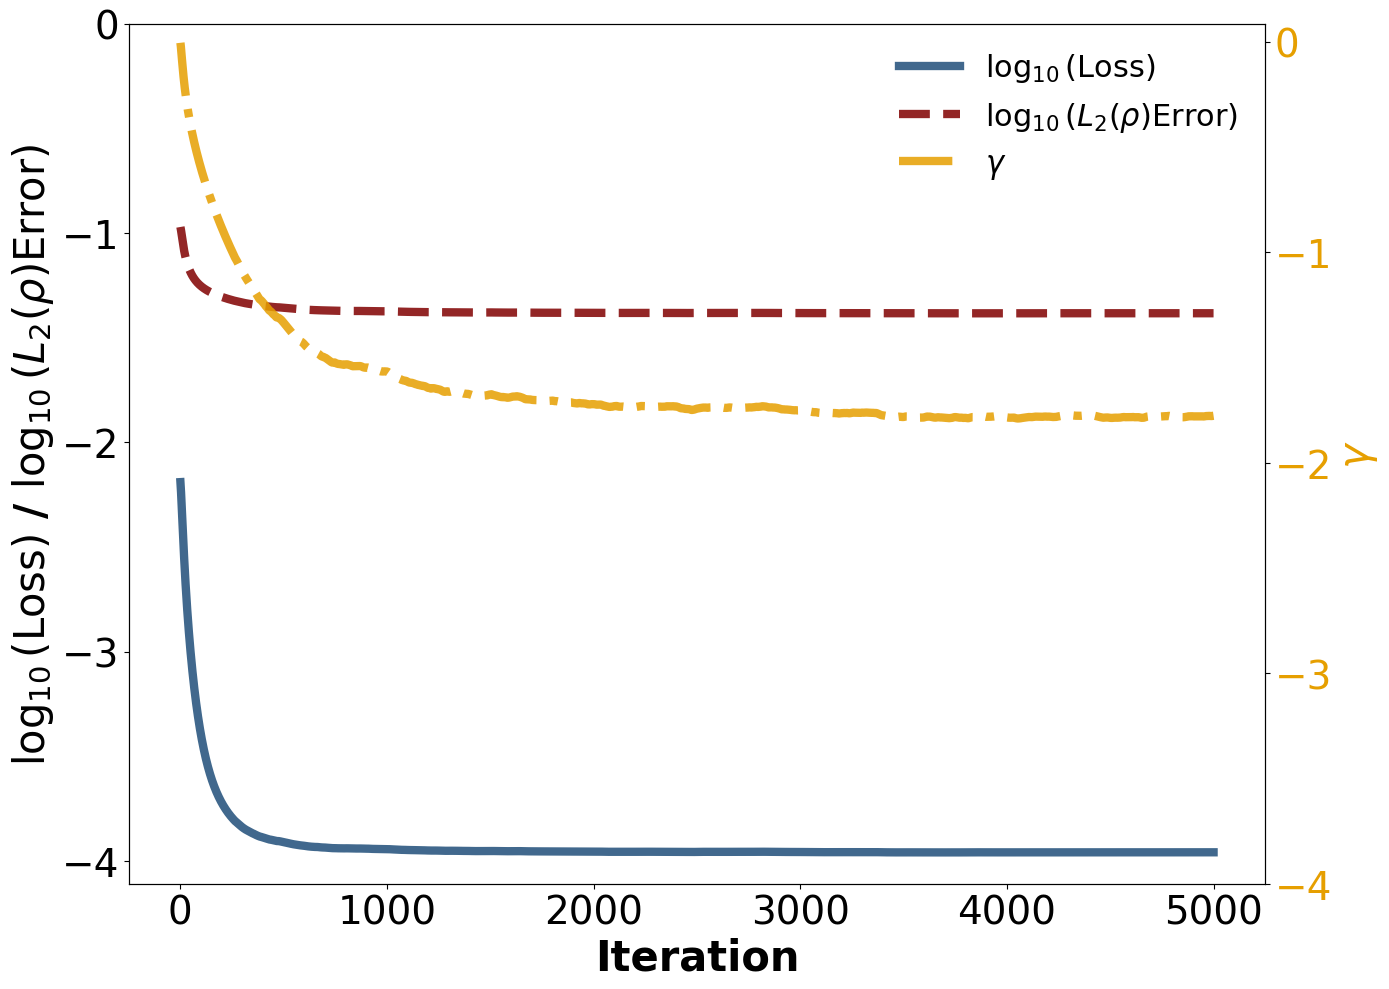

In [23]:
# Increase figure size for better readability
fig, ax1 = plt.subplots(figsize=(14, 10))

# Define improved academic-style colors
loss_color = '#1f4e79'  # Deep Royal Blue for Loss
gamma_color = '#e69f00'  # Warm Golden for Gamma
error_color = '#800000'
# Plot Loss on primary y-axis
ax1.plot(iteration_history, log10_loss, label=r'$\log_{10}(\mathrm{Loss})$', color=loss_color, linestyle='-', linewidth=6, alpha=0.85)
ax1.plot(iteration_history, log10_error, label=r'$\log_{10}(L_2(\rho)\mathrm{Error})$',color=error_color, linestyle='--', linewidth=6, alpha=0.85)
# Secondary y-axis for Gamma
ax2 = ax1.twinx()
ax2.plot(iteration_history, gamma_history, label=r'$\gamma$', color=gamma_color, linestyle='-.', linewidth=6, alpha=0.85)
# Labels and formatting
ax1.set_xlabel('Iteration', fontsize=30, fontweight='bold')
ax1.set_ylabel(r'$\log_{10}(\mathrm{Loss})$ / $\log_{10}(L_2(\rho)\mathrm{Error})$', fontsize=30, fontweight='bold')
ax2.set_ylabel(r'$\gamma$', fontsize=30, fontweight='bold', color=gamma_color)

y1min, y1max = ax1.get_ylim()
ticks1 = np.arange(-4,1,1)
ax1.set_yticks(ticks1)

ticks2 = np.arange(-4,1,1)
ax2.set_yticks(ticks2)

# Set tick sizes for consistency
ax1.tick_params(axis='x', labelsize=28)
ax1.tick_params(axis='y', labelsize=28)
ax2.tick_params(axis='y', labelsize=28, labelcolor=gamma_color)

# Improve grid visibility
# ax1.grid(True, linestyle='--', linewidth=1, alpha=0.5)

# Combine legends from both axes
lines1, labels1 = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
leg =ax1.legend(lines1 + lines2, labels1 + labels2, frameon=False, loc="upper right", fontsize=22)

leg.set_zorder(100) 
# Ensure tight layout
plt.tight_layout()
# 如需保存图片，请取消下面注释，并指定保存路径 
figure_path = os.path.join(add_mypathlevy.figure_folder, f"KDEPurejump{kernel_type}LossErrorGammadx{dx}bandwidth{bandwidth}N{N}.pdf")
plt.savefig(figure_path, bbox_inches='tight', dpi=500)
# Show the final combined figure
plt.show()